In [ ]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment=None
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


In [ ]:
df=pd.read_csv("diabetes_training.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,120.0,76.0,37.0,105.0,39.7,0.215,29.0,0.0
1,5.0,126.0,78.0,27.0,22.0,29.6,0.439,40.0,0.0
2,1.0,79.0,60.0,42.0,48.0,43.5,0.678,23.0,0.0
3,0.0,118.0,84.0,47.0,230.0,45.8,0.551,31.0,1.0
4,0.0,101.0,64.0,17.0,0.0,21.0,0.252,21.0,0.0


In [ ]:
#Preprocessing
#Changing 0 values in Glucose, BloodPressure and BMI
df_nodiab=df[df["Outcome"]==0]
df_diab=df[df["Outcome"]==1]
glucose_count_0=0
glucose_count_1=0
bloodpressure_count_0=0
bloodpressure_count_1=0
bmi_count_0=0
bmi_count_1=0
glucose=df_nodiab["Glucose"]
bloodpressure=df_nodiab["BloodPressure"]
bmi=df_nodiab["BMI"]
for i in glucose:
  if i==0:
    glucose_count_0=glucose_count_0+1
for i in bloodpressure:
  if i==0:
    bloodpressure_count_0=bloodpressure_count_0+1
for i in bmi:
  if i==0:
    bmi_count_0=bmi_count_0+1
avg_glucose_0=np.mean(glucose)*(glucose.shape[0]/(glucose.shape[0]-glucose_count_0))
avg_bloodpressure_0=np.mean(bloodpressure)*(bloodpressure.shape[0]/(bloodpressure.shape[0]-bloodpressure_count_0))
avg_bmi_0=np.mean(bmi)*(bmi.shape[0]/(bmi.shape[0]-bmi_count_0))
glucose=df_diab["Glucose"]
bloodpressure=df_diab["BloodPressure"]
bmi=df_diab["BMI"]
for i in glucose:
  if i==0:
    glucose_count_1=glucose_count_1+1
for i in bloodpressure:
  if i==0:
    bloodpressure_count_1=bloodpressure_count_1+1
for i in bmi:
  if i==0:
    bmi_count_1=bmi_count_1+1
avg_glucose_1=np.mean(glucose)*(glucose.shape[0]/(glucose.shape[0]-glucose_count_1))
avg_bloodpressure_1=np.mean(bloodpressure)*(bloodpressure.shape[0]/(bloodpressure.shape[0]-bloodpressure_count_1))
avg_bmi_1=np.mean(bmi)*(bmi.shape[0]/(bmi.shape[0]-bmi_count_1))
arr=df.values
for i in arr:
  if i[8]==0:
    if i[1]==0:
      i[1]=avg_glucose_0
    if i[2]==0:
      i[2]=avg_bloodpressure_0
    if i[5]==0:
      i[5]=avg_bmi_0
  else:
    if i[1]==0:
      i[1]=avg_glucose_1
    if i[2]==0:
      i[2]=avg_bloodpressure_1
    if i[5]==0:
      i[5]=avg_bmi_1
df=pd.DataFrame(arr,index=df.index,columns=df.columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,120.0,76.0,37.0,105.0,39.7,0.215,29.0,0.0
1,5.0,126.0,78.0,27.0,22.0,29.6,0.439,40.0,0.0
2,1.0,79.0,60.0,42.0,48.0,43.5,0.678,23.0,0.0
3,0.0,118.0,84.0,47.0,230.0,45.8,0.551,31.0,1.0
4,0.0,101.0,64.0,17.0,0.0,21.0,0.252,21.0,0.0


In [ ]:
x_columns=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
df_x=df[x_columns]
scaler=StandardScaler()
scaled=scaler.fit_transform(df_x)
df_x=pd.DataFrame(scaled,index=df_x.index,columns=df_x.columns)
df[x_columns]=df_x
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.864020,-0.035389,0.907270,-0.692891,0.167806,0.468492,1.425995,1.0
1,-0.844885,-1.205478,-0.531332,0.530902,-0.692891,-0.850452,-0.365061,-0.190672,0.0
2,1.233880,2.013741,-0.696647,-1.288212,-0.692891,-1.330487,0.604397,-0.105584,1.0
3,-0.844885,-1.074081,-0.531332,0.154533,0.123302,-0.632253,-0.920763,-1.041549,0.0
4,-1.141852,0.502679,-2.680419,0.907270,0.765836,1.549727,5.484909,-0.020496,1.0


In [ ]:
X=df[x_columns].values
Y=df["Outcome"].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
model=Perceptron(class_weight="balanced")
model.fit(X_train,Y_train)
Y_hat=model.predict(X_test)
print("Accuracy: ",accuracy_score(Y_test,Y_hat))

Accuracy:  0.7532467532467533


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, Y_hat)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, Y_hat)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, Y_hat)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, Y_hat)
print('F1 score: %f' % f1)

Accuracy: 0.753247
Precision: 0.607843
Recall: 0.632653
F1 score: 0.620000


In [ ]:
confusion_matrix(Y_test, Y_hat)

array([[85, 20],
       [18, 31]])

In [ ]:
df_train=pd.read_csv("diabetes_training.csv")
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,120.0,76.0,37.0,105.0,39.7,0.215,29.0,0.0
1,5.0,126.0,78.0,27.0,22.0,29.6,0.439,40.0,0.0
2,1.0,79.0,60.0,42.0,48.0,43.5,0.678,23.0,0.0
3,0.0,118.0,84.0,47.0,230.0,45.8,0.551,31.0,1.0
4,0.0,101.0,64.0,17.0,0.0,21.0,0.252,21.0,0.0


In [ ]:
X_train=df_train[x_columns].values
Y_train=df_train["Outcome"].values

In [ ]:
model=Perceptron()
model.fit(X,Y)

Perceptron()

In [ ]:
df_test=pd.read_csv("diabetes_testing.csv")
df_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,107.0,74.0,30.0,100.0,33.6,0.404,23.0,0.0
1,9.0,145.0,80.0,46.0,130.0,37.9,0.637,40.0,1.0
2,0.0,162.0,76.0,56.0,100.0,53.2,0.759,25.0,1.0
3,1.0,100.0,66.0,29.0,196.0,32.0,0.444,42.0,0.0
4,2.0,94.0,76.0,18.0,66.0,31.6,0.649,23.0,0.0


In [ ]:
X_test=df_test[x_columns].values
Y_test=df_test["Outcome"].values

In [ ]:
Y_hat=model.predict(X_test)
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, Y_hat)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, Y_hat)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, Y_hat)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, Y_hat)
print('F1 score: %f' % f1)

Accuracy: 0.681034
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Y_hat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Hyper-parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'l1_ratio': [0.1,0.15,0.3,0.5,0.7,0.9],

              'alpha':[1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001,
                                   1e-05, 1e-06, 1e-07, 1e-07, 1e-08, 1e-09,
                                   1e-10, 1e-11],
              'tol':[1e-3,1e-2,1e-6],
              'max_iter':[1000,10000,100000,10000000],
                'early_stopping':[True,False],
              'penalty': [None,'l2','l1','elasticnet']}

grid = GridSearchCV(Perceptron(class_weight="balanced"), param_grid, refit = True, verbose = 3,n_jobs=10)

# grid.fit(X_train, Y_train)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(grid, X_train, Y_train, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Fitting 5 folds for each of 9216 candidates, totalling 46080 fits


KeyboardInterrupt: ignored

In [ ]:
print(grid.best_estimator_)

Perceptron(alpha=0.01, class_weight='balanced', early_stopping=True,
           l1_ratio=0.7, penalty='elasticnet')


              precision    recall  f1-score   support

         0.0       0.86      0.50      0.63       401
         1.0       0.47      0.85      0.61       213

    accuracy                           0.62       614
   macro avg       0.67      0.67      0.62       614
weighted avg       0.73      0.62      0.62       614



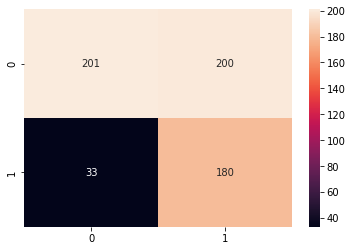

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(Y_train, grid.predict(X_train))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_train,  grid.predict(X_train)))

import seaborn as sns
sns.heatmap(cf_matrix, annot=True, fmt='g')

# RandomUnderSampler

In [ ]:
from imblearn.under_sampling import RandomUnderSampler # Up-sample or Down-sample

rus = RandomUnderSampler(random_state=42)
X_res, Y_res = rus.fit_resample(X, Y)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.005)

print("Training data set shape : ", X_train.shape, Y_train.shape)
print("Test data set shape : ", X_test.shape, Y_test.shape)

Training data set shape :  (764, 8) (764,)
Test data set shape :  (4, 8) (4,)


In [ ]:
model=Perceptron()
model.fit(X_train,Y_train)
Y_hat=model.predict(X_test)
print("Accuracy: ",accuracy_score(Y_test,Y_hat))

Accuracy:  0.75


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_test, Y_hat)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_test, Y_hat)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_test, Y_hat)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_test, Y_hat)
print('F1 score: %f' % f1)

Accuracy: 0.750000
Precision: 0.000000
Recall: 0.000000
F1 score: 0.000000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
confusion_matrix(Y_test, Y_hat)

array([[3, 1],
       [0, 0]])